# Datasets

## Fetching Data From Library

In [1]:
from sklearn.datasets import load_boston
import pandas as pd

In [4]:
data, target = load_boston(return_X_y=True)

In [5]:
bostonDF = pd.DataFrame(data=data,columns=load_boston().feature_names)
bostonDF["label"] = target

In [6]:
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,label
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Fetching Data From Web

This dataset records the games purchases for given customers, the label represents if the customers bought or not a new video game. 

In [7]:
gamesDF = pd.read_csv("https://github.com/bgweber/Twitch/raw/master/Recommendations/games-expand.csv")

In [8]:
gamesDF.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,label
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,1,1
4,0,0,1,0,1,1,0,1,1,0,1


## BigQuery to Pandas

After creating the project and the credentials json file, set the environment variable

In [1]:
!export GOOGLE_APPLICATION_CREDENTIALS=/home/ubuntu/mlops/dsdemo.json

In [3]:
from google.cloud import bigquery
client = bigquery.Client()
sql = """
SELECT *
FROM
`bigquery-public-data.samples.natality`
LIMIT 10
"""
natalityDF = client.query(sql).to_dataframe()
natalityDF.head()

,source_year,year,month,day,wday,state,is_male,child_race,weight_pounds,plurality,...,alcohol_use,drinks_per_week,weight_gain_pounds,born_alive_alive,born_alive_dead,born_dead,ever_born,father_race,father_age,record_weight
0,2005,2005,7,NaN,3.0,None,False,NaN,8.628893,1.0,...,False,NaN,57.0,9.0,0.0,0.0,10,78,38,1
1,2005,2005,4,NaN,6.0,None,True,NaN,2.678616,1.0,...,False,NaN,23.0,7.0,0.0,0.0,8,78,39,1
2,2006,2006,5,NaN,1.0,None,True,NaN,11.062796,1.0,...,False,NaN,11.0,NaN,NaN,NaN,8,68,41,1
3,2007,2007,3,NaN,2.0,None,False,NaN,5.436599,2.0,...,False,NaN,10.0,NaN,NaN,NaN,8,78,42,1
4,2007,2007,4,NaN,7.0,None,False,NaN,3.560466,1.0,...,False,NaN,18.0,NaN,NaN,NaN,8,78,43,1


## Kaggle To Pandas

In [7]:
import pandas as pd
nhlDF = pd.read_csv("../data/nhl-game-data/game.csv")
nhlDF.head()

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
1,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
3,2011030224,20112012,P,2012-05-06,2012-05-06T23:30:00Z,4,1,2,4,home win REG,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
4,2011030225,20112012,P,2012-05-08,2012-05-08T23:30:00Z,1,4,3,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT


# Prototype Models

## Linear Regressor

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
import pandas as pd

In [13]:
from sklearn.datasets import load_boston
data, target = load_boston(return_X_y=True)
bostonDF = pd.DataFrame(data=data, columns=load_boston().feature_names)

In [15]:
bostonDF["label"] = target

In [16]:
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,label
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
x_train, x_test, y_train, y_test = train_test_split(bostonDF.drop(['label'], axis=1), 
                                                    bostonDF['label'], test_size=0.3)

In [18]:
model = LinearRegression()

In [22]:
model.fit(x_train, y_train)

LinearRegression()

In [23]:
from sklearn.metrics import mean_absolute_error

In [24]:
print(f"R^2: {model.score(x_test, y_test):.5f}")
print(f"Mean Error: {mean_absolute_error(model.predict(x_test),y_test):.5f}")

R^2: 0.73000
Mean Error: 3.53059


## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import pandas as pd

In [26]:
gamesDF = pd.read_csv("https://github.com/bgweber/Twitch/raw/master/Recommendations/games-expand.csv")
x_train, x_test, y_train, y_test = train_test_split(gamesDF.drop(['label'], axis=1), 
                                                    gamesDF['label'], test_size=0.3)

In [27]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [28]:
print(f"Accuracy: {model.score(x_test, y_test):.5f}")
print(f"ROC: {roc_auc_score(y_test.values,model.predict_proba(x_test)[:,1]):.5f}")

Accuracy: 0.86874
ROC: 0.75984


## Keras Model

In [29]:
from sklearn.model_selection import train_test_split
import pandas as pd
gamesDF = pd.read_csv("https://github.com/bgweber/Twitch/raw/master/Recommendations/games-expand.csv")
x_train, x_test, y_train, y_test = train_test_split(gamesDF.drop(['label'], axis=1), 
                                                    gamesDF['label'], test_size=0.3)

In [30]:
import tensorflow as tf

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [32]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

In [33]:
history = model.fit(x_train, y_train, epochs=100, batch_size=100, validation_split=0.2)

Epoch 1/100
129/129 [==============================] - 1s 4ms/step - loss: 0.3815 - auc: 0.6829 - val_loss: 0.3237 - val_auc: 0.8010
Epoch 2/100
129/129 [==============================] - 0s 2ms/step - loss: 0.3239 - auc: 0.7965 - val_loss: 0.3131 - val_auc: 0.8143
Epoch 3/100
129/129 [==============================] - 0s 3ms/step - loss: 0.3195 - auc: 0.8050 - val_loss: 0.3109 - val_auc: 0.8129
Epoch 4/100
129/129 [==============================] - 0s 3ms/step - loss: 0.3180 - auc: 0.8053 - val_loss: 0.3106 - val_auc: 0.8169
Epoch 5/100
129/129 [==============================] - 0s 3ms/step - loss: 0.3159 - auc: 0.8082 - val_loss: 0.3136 - val_auc: 0.8148
Epoch 6/100
129/129 [==============================] - 0s 3ms/step - loss: 0.3145 - auc: 0.8100 - val_loss: 0.3139 - val_auc: 0.8124
Epoch 7/100
129/129 [==============================] - 0s 3ms/step - loss: 0.3141 - auc: 0.8102 - val_loss: 0.3120 - val_auc: 0.8161
Epoch 8/100
129/129 [==============================] - 0s 3ms/step - 

In [34]:
import matplotlib.pyplot as plt

In [38]:
metric = history.history['auc']
val_metric = history.history['val_auc']
epochs = range(1,len(metric)+1)

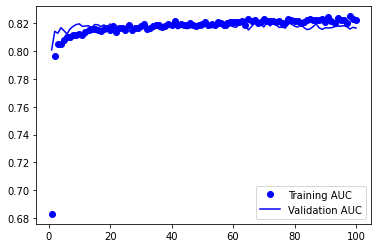

In [39]:
plt.plot(epochs, metric, 'bo', label='Training AUC')
plt.plot(epochs, val_metric, 'b', label='Validation AUC')
plt.legend()
plt.show()

In [40]:
results = model.evaluate(x_test, y_test)

215/215 [==============================] - 0s 2ms/step - loss: 0.3156 - auc: 0.8051


In [43]:
print(f"ROC: {results[1]:.5f}")

ROC: 0.80508


## Feature Engineering

In [99]:
import pandas as pd
game_df = pd.read_csv("../data/nhl-game-data/game.csv")
plays_df = pd.read_csv("../data/nhl-game-data/game_plays.csv")
plays_df = plays_df.drop(['secondaryType','periodType','dateTime','rink_side'], axis=1).fillna(0)

In [100]:
import featuretools as ft

In [101]:
from featuretools import Feature

In [102]:
es = ft.EntitySet(id="plays")

In [103]:
es = es.entity_from_dataframe(entity_id="plays", dataframe=plays_df, index="play_id", 
                              variable_types={"event":ft.variable_types.Categorical, 
                                              "description":ft.variable_types.Categorical})

In [104]:
f1 = Feature(es["plays"]["event"])
f2 = Feature(es["plays"]["description"])

In [105]:
plays_df.describe(include="all")

,play_id,game_id,play_num,team_id_for,team_id_against,event,x,y,period,periodTime,periodTimeRemaining,goals_away,goals_home,description,st_x,st_y
count,3632349,3.632349e+06,3.632349e+06,3.632349e+06,3.632349e+06,3632349,3.632349e+06,3.632349e+06,3.632349e+06,3.632349e+06,3.632349e+06,3.632349e+06,3.632349e+06,3632349,3.632349e+06,3.632349e+06
unique,3632349,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1046856,NaN,NaN
top,2010020462_193,NaN,NaN,NaN,NaN,Faceoff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Goalie Stopped,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,674022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192089,NaN,NaN
mean,NaN,2.014167e+09,1.640390e+02,1.407413e+01,1.402587e+01,NaN,2.486201e-01,-1.695286e-01,2.025667e+00,5.857848e+02,5.977514e+02,1.209766e+00,1.342356e+00,NaN,8.020748e+00,1.293529e-01
std,NaN,2.609087e+06,9.688326e+01,1.280861e+01,1.277457e+01,NaN,5.767319e+01,2.065551e+01,8.711215e-01,3.659597e+02,3.641515e+02,1.296367e+00,1.398705e+00,NaN,5.709612e+01,2.065580e+01
min,NaN,2.010020e+09,1.000000e+00,0.000000e+00,0.000000e+00,NaN,-9.900000e+01,-4.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,-9.900000e+01,-4.200000e+01
25%,NaN,2.012020e+09,8.100000e+01,3.000000e+00,3.000000e+00,NaN,-5.700000e+01,-1.600000e+01,1.000000e+00,2.650000e+02,2.810000e+02,0.000000e+00,0.000000e+00,NaN,-4.400000e+01,-1.600000e+01
50%,NaN,2.014021e+09,1.620000e+02,1.300000e+01,1.300000e+01,NaN,0.000000e+00,0.000000e+00,2.000000e+00,5.790000e+02,5.980000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00
75%,NaN,2.016030e+09,2.430000e+02,2.200000e+01,2.200000e+01,NaN,5.800000e+01,1.600000e+01,3.000000e+00,9.030000e+02,9.150000e+02,2.000000e+00,2.000000e+00,NaN,6.400000e+01,1.600000e+01


In [106]:
encoded, defs = ft.encode_features(plays_df, [f1, f2], top_n=10)
encoded.reset_index(inplace=True)
encoded.head()

,index,event = Faceoff,event = Shot,event = Hit,event = Stoppage,event = Blocked Shot,event = Missed Shot,event = Giveaway,event = Takeaway,event = Penalty,...,team_id_against,x,y,period,periodTime,periodTimeRemaining,goals_away,goals_home,st_x,st_y
0,0,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.0,1,0,1200,0,0,0.0,0.0
1,1,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.0,1,0,1200,0,0,0.0,0.0
2,2,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.0,1,0,1200,0,0,0.0,0.0
3,3,True,False,False,False,False,False,False,False,False,...,1.0,0.0,0.0,1,0,1200,0,0,0.0,0.0
4,4,False,False,False,False,False,False,True,False,False,...,1.0,28.0,24.0,1,21,1179,0,0,-28.0,-24.0


In [107]:
es = ft.EntitySet(id="plays")
es = es.entity_from_dataframe(entity_id="plays",
                                    dataframe=encoded, index="play_id")
es = es.normalize_entity(base_entity_id="plays",
                        new_entity_id="games", index="game_id")
features, transform = ft.dfs(entityset=es,
                            target_entity="games",max_depth=2)
features.reset_index(inplace=True)
features.head()

,game_id,COUNT(plays),MAX(plays.goals_away),MAX(plays.goals_home),MAX(plays.index),MAX(plays.period),MAX(plays.periodTime),MAX(plays.periodTimeRemaining),MAX(plays.play_num),MAX(plays.st_x),...,SUM(plays.period),SUM(plays.periodTime),SUM(plays.periodTimeRemaining),SUM(plays.play_num),SUM(plays.st_x),SUM(plays.st_y),SUM(plays.team_id_against),SUM(plays.team_id_for),SUM(plays.x),SUM(plays.y)
0,2011030221,354,3,4,353,4,1200,1200,354,98.0,...,797,195253,229547,62835,3324.0,-313.0,680.0,740.0,812.0,117.0
1,2011030111,361,2,4,714,3,1200,1200,361,97.0,...,728,206526,226674,65341,2733.0,462.0,1773.0,1743.0,379.0,326.0
2,2011030222,312,4,1,1026,3,1200,1200,312,97.0,...,623,182938,191462,48828,1017.0,394.0,677.0,623.0,-2141.0,-144.0
3,2011030223,320,3,4,1346,4,1200,1200,320,98.0,...,752,181402,202598,51360,4281.0,-86.0,667.0,598.0,3540.0,178.0
4,2011030224,307,2,4,1653,3,1200,1200,307,97.0,...,599,191795,176605,47278,3473.0,-605.0,582.0,633.0,405.0,413.0


we
have generated hundreds of features to describe each game using
deep feature synthesis. Instead of hand coding this translation, we
utilized the FeatureTools library to automate this process.

In [108]:
import framequery as fq
features = fq.execute("""
    SELECT f.*, case when g.type='P' then 1 else 0 end AS label
    FROM features AS f JOIN game_df AS g ON f.game_id = g.game_id
""")

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
y = features["label"]
X = features.drop(["label","game_id"], axis=1).fillna(0)
model = LogisticRegression()
model.fit(X,y)
# Print Results:
print(f"accuracy: {model.score(X,y):.5f}")
print(f"auc: {roc_auc_score(y,model.predict_proba(X)[:,1]):.5f}")

accuracy: 0.95384
auc: 0.92016
